In [4]:
%load_ext autoreload
%autoreload 2

import os
import numpy as np
import pandas as pd
import utils.pseudo_utils as pseudo_utils
import utils.pseudo_classifier_utils as pseudo_classifier_utils
import utils.behavioral_utils as behavioral_utils
import utils.visualization_utils as visualization_utils
import utils.classifier_utils as classifier_utils
import utils.spike_utils as spike_utils
from utils.session_data import SessionData

from models.trainer import Trainer
from models.model_wrapper import ModelWrapper, ModelWrapperLinearRegression
from models.multinomial_logistic_regressor import NormedDropoutMultinomialLogisticRegressor

from trial_splitters.condition_kfold_block_splitter import ConditionKFoldBlockSplitter

import json

from spike_tools import (
    general as spike_general,
    analysis as spike_analysis,
)

PRE_INTERVAL = 1300
POST_INTERVAL = 1500
INTERVAL_SIZE = 100
EVENT = "FeedbackOnset"
SESSIONS_PATH = "/data/patrick_scratch/multi_sess/valid_sessions.pickle"

import matplotlib.pyplot as plt
import matplotlib

feature_dims = ["Color", "Shape", "Pattern"]

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


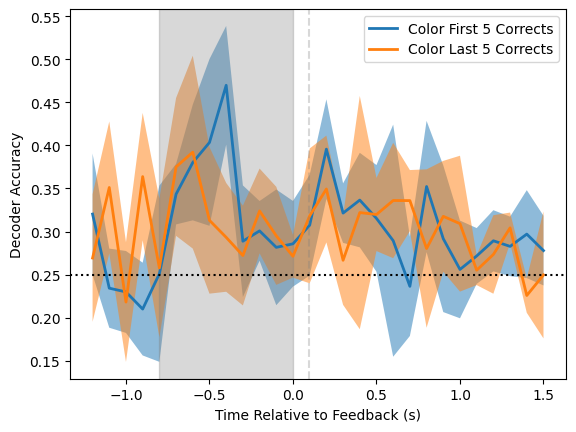

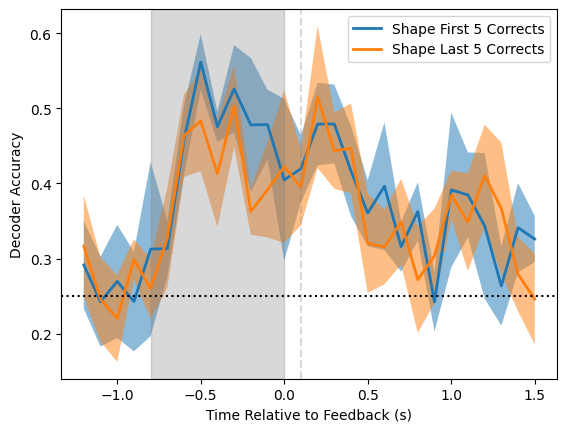

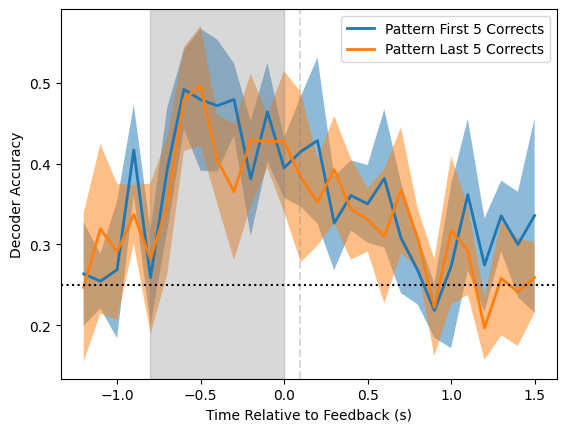

In [2]:
for feature_dim in feature_dims:
    fig, ax = plt.subplots()
    test_first = np.load(f"/data/patrick_scratch/pseudo/first_five_{feature_dim}_test_accs.npy")
    test_last = np.load(f"/data/patrick_scratch/pseudo/last_five_{feature_dim}_test_accs.npy")
    visualization_utils.visualize_accuracy_across_time_bins(
        test_first,
        1.3, 1.5, 0.1,
        ax,
        label=f"{feature_dim} First 5 Corrects",
        right_align=True, 
    )
    visualization_utils.visualize_accuracy_across_time_bins(
        test_last,
        1.3, 1.5, 0.1,
        ax,
        label=f"{feature_dim} Last 5 Corrects",
        right_align=True, 
    )
    ax.legend()
    # ax.set_title(f"{feature_dim} decoding with different rules")
    ax.axvspan(-0.8, 0, alpha=0.3, color='gray')
    ax.axvline(0.098, alpha=0.3, color='gray', linestyle='dashed')
    ax.axhline(0.25, color='black', linestyle='dotted', label="Estimated Chance")
    ax.set_xlabel("Time Relative to Feedback (s)")
    ax.set_ylabel("Decoder Accuracy")

### Plot some weights, see if they're different

In [7]:
def plot_weights(models, positions, ax):
    weights = classifier_utils.evaluate_model_weights_by_time_bins(models, 1117, 4)
    sums = np.sum(weights, axis=0)
    normalized = weights / sums

    visualization_utils.visualize_weights(positions, normalized, "manual_structure", ax=ax)

[ 470.5  486.5  615.5  783.5  859.5  941.5  943.5  944.5 1031.5 1077.5
 1079.5 1108.5]
14
[ 470.5  486.5  615.5  783.5  859.5  941.5  943.5  944.5 1031.5 1077.5
 1079.5 1108.5]
14
[ 470.5  486.5  615.5  783.5  859.5  941.5  943.5  944.5 1031.5 1077.5
 1079.5 1108.5]
14
[ 470.5  486.5  615.5  783.5  859.5  941.5  943.5  944.5 1031.5 1077.5
 1079.5 1108.5]
14
[ 470.5  486.5  615.5  783.5  859.5  941.5  943.5  944.5 1031.5 1077.5
 1079.5 1108.5]
14
[ 470.5  486.5  615.5  783.5  859.5  941.5  943.5  944.5 1031.5 1077.5
 1079.5 1108.5]
14


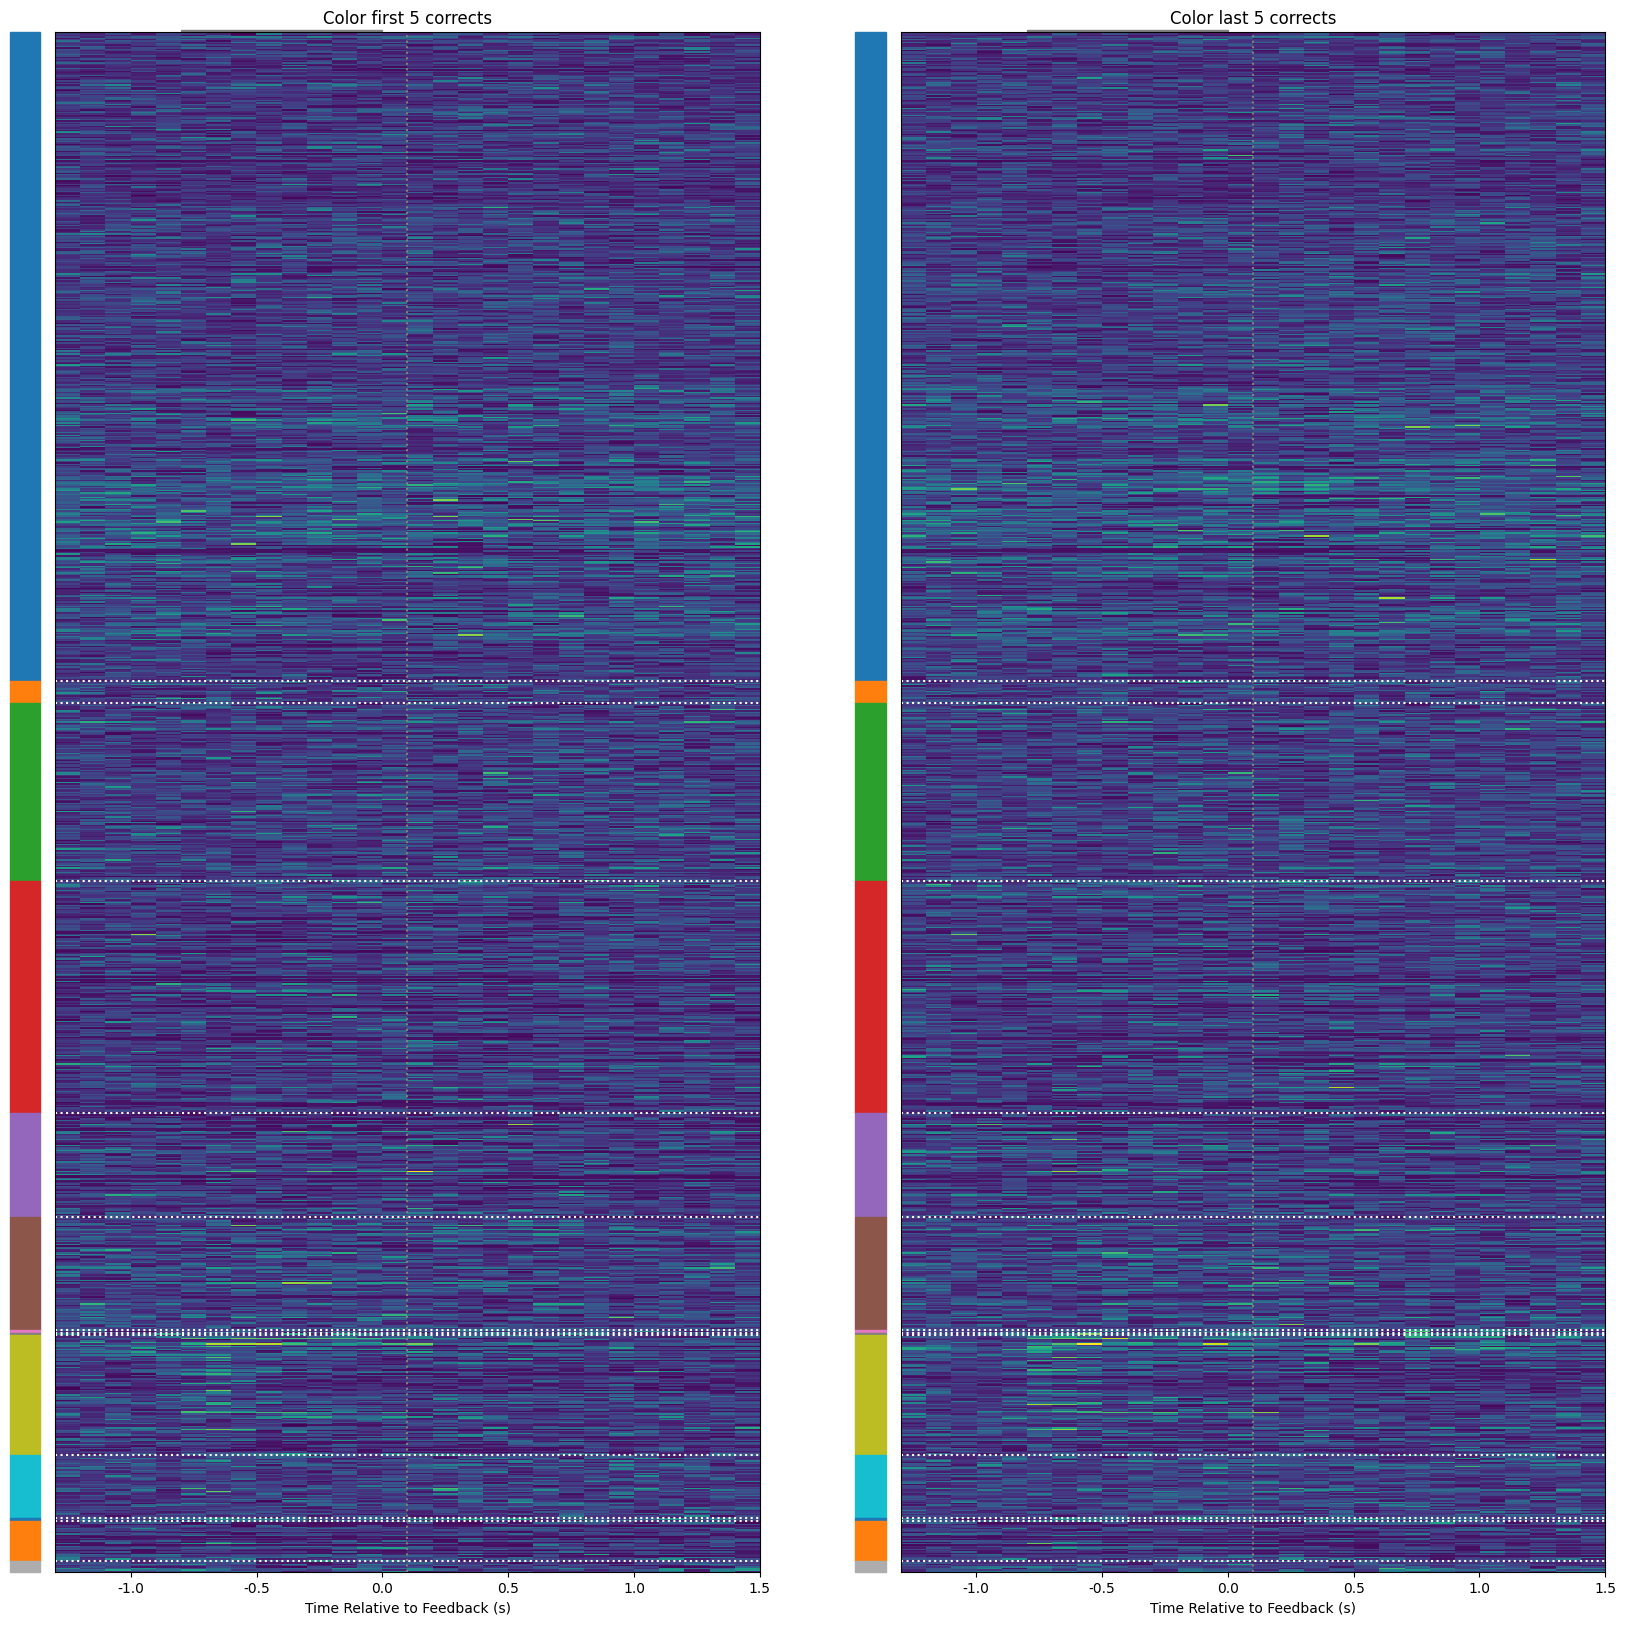

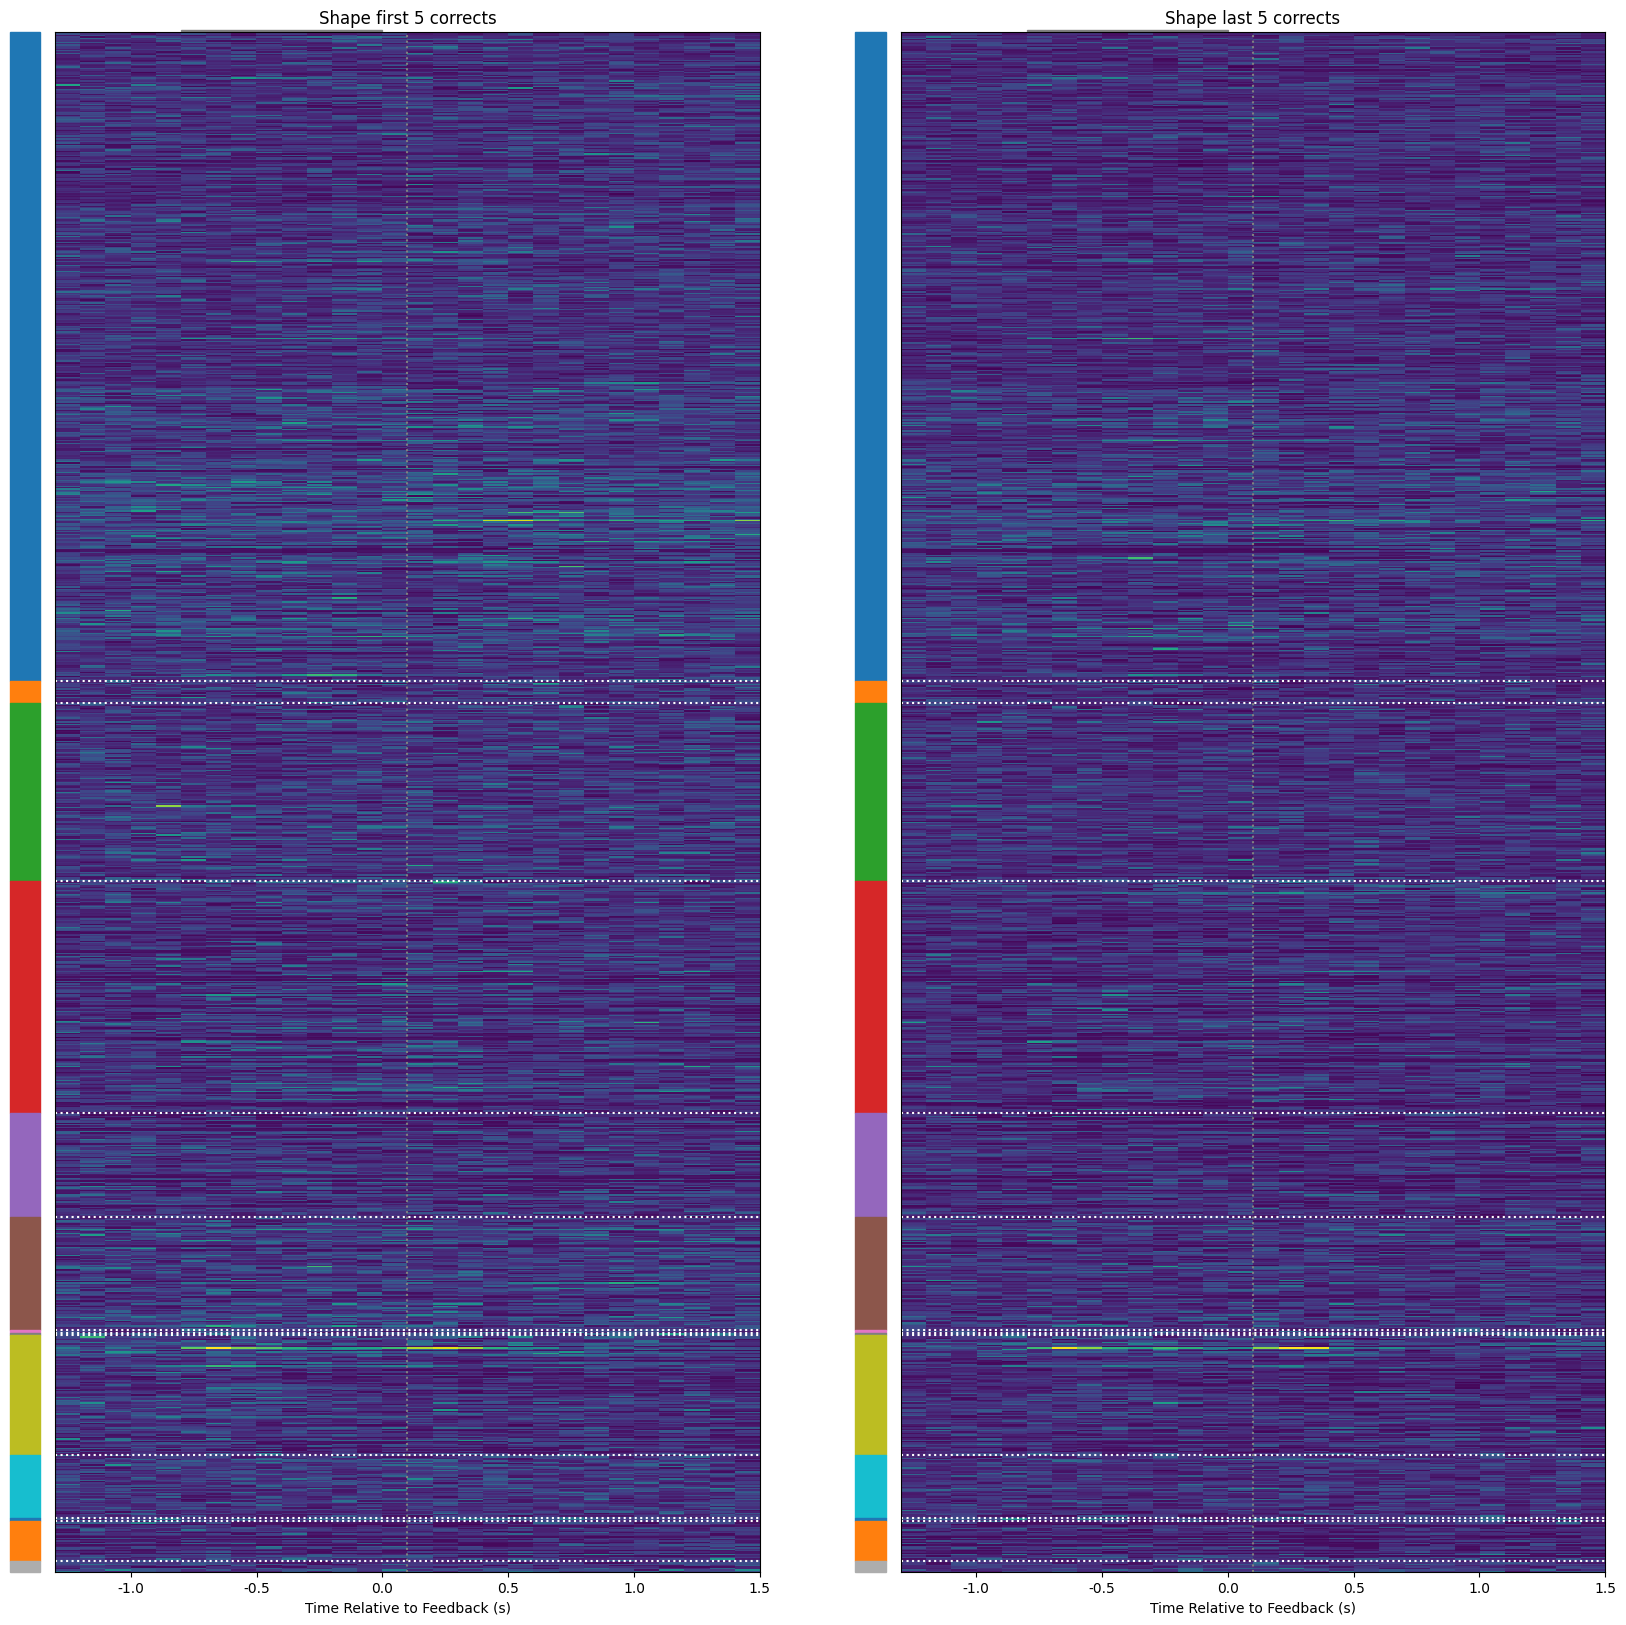

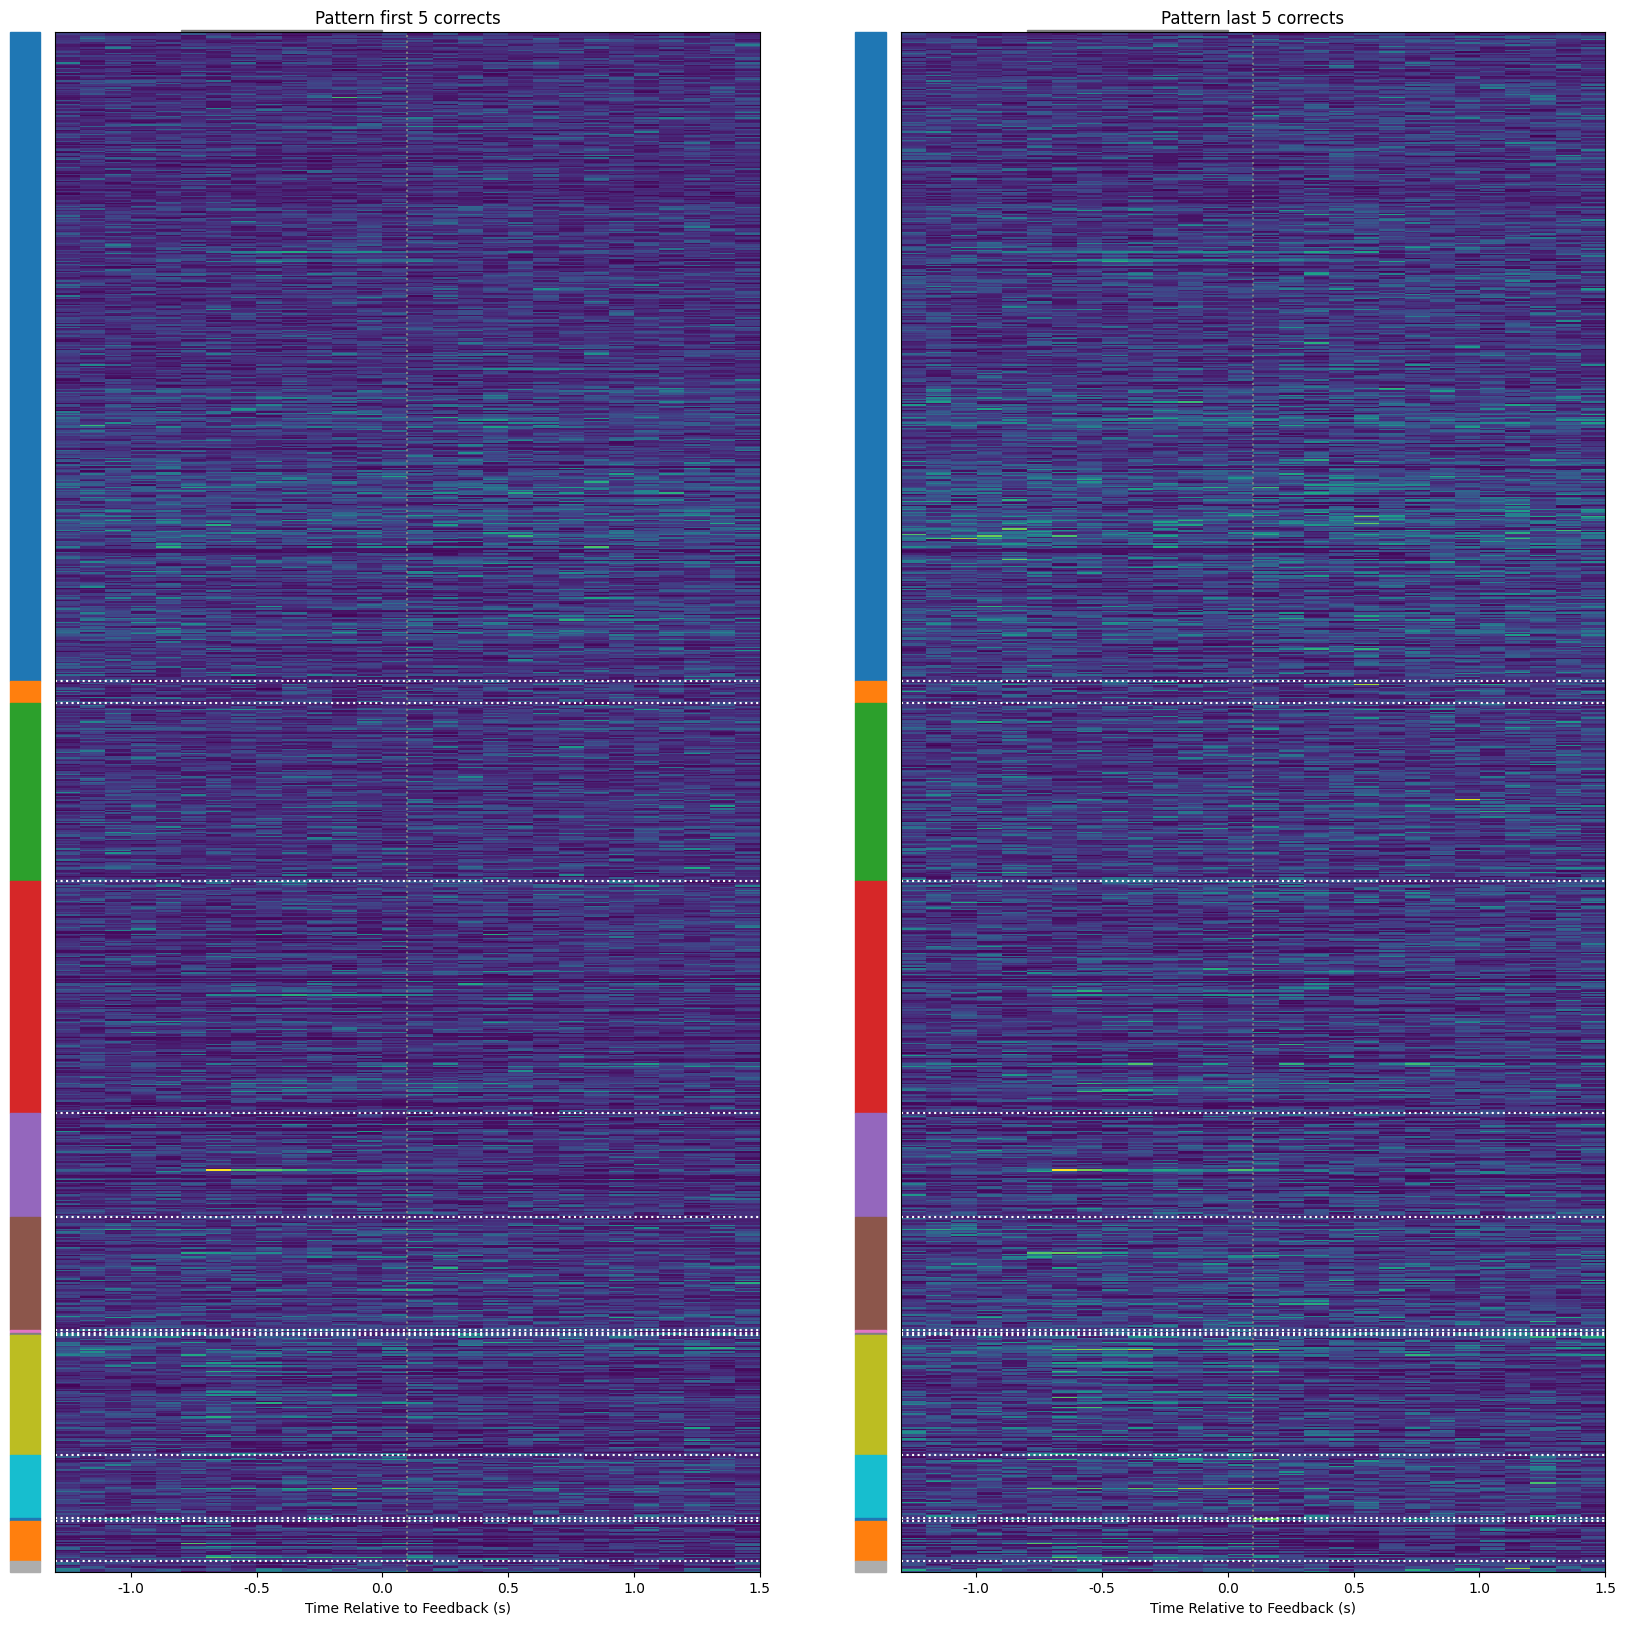

In [11]:


for feature_dim in feature_dims:
    models_first = np.load(f"/data/patrick_scratch/pseudo/first_five_{feature_dim}_models.npy", allow_pickle=True)
    models_last = np.load(f"/data/patrick_scratch/pseudo/last_five_{feature_dim}_models.npy", allow_pickle=True)

    valid_sess = pd.read_pickle(SESSIONS_PATH)
    positions = spike_utils.get_unit_positions(valid_sess)

    fig, axs = plt.subplots(1, 2, figsize=(20, 20))
    plot_weights(models_first, positions, axs[0])
    axs[0].set_title(f"{feature_dim} first 5 corrects")

    plot_weights(models_last, positions, axs[1])
    axs[1].set_title(f"{feature_dim} last 5 corrects")
